In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from torchvision import utils
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

cuda:0


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
path_train = '/content/drive/MyDrive/BME AI/CNN classification/data/train'
path_valid = '/content/drive/MyDrive/BME AI/CNN classification/data/validation'
path_test = '/content/drive/MyDrive/BME AI/CNN classification/data/test/'

## 영상데이터에 대한 전처리과정 정의하기

In [6]:
train_transforms = transforms.Compose(
      [
          transforms.Grayscale(num_output_channels=3),
          transforms.Resize((224,224)),
          transforms.ToTensor(),
      ]
    )

## ImageFolder를 활용하여 data loader를 생성하기

In [9]:
batch_size = 32

trainset = torchvision.datasets.ImageFolder(root = path_train,transform=train_transforms)
validset = torchvision.datasets.ImageFolder(root = path_valid,transform=train_transforms)
testset = torchvision.datasets.ImageFolder(root = path_test,transform=train_transforms)

trainloader = torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True)
validloader = torch.utils.data.DataLoader(validset,batch_size=batch_size,shuffle=False)
testloader = torch.utils.data.DataLoader(testset,batch_size=batch_size,shuffle=False)

In [10]:
tgtnames = trainset.classes
print(tgtnames)

['MBD', 'normal']


In [11]:
print(len(trainset),len(validset), len(testset))

665 78 78


torch.Size([32, 3, 224, 224])
torch.Size([32])


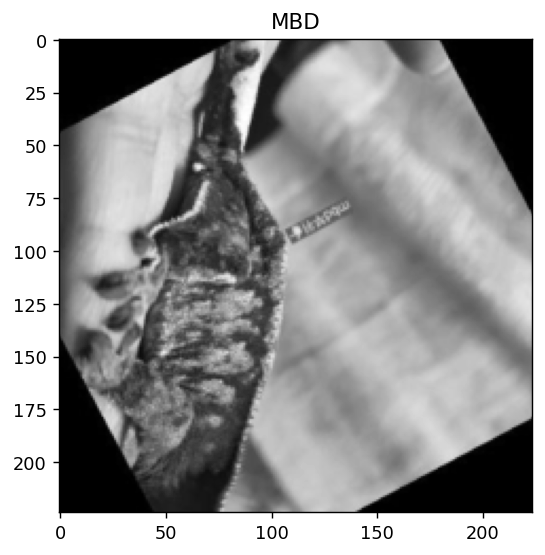

In [12]:
for X, y in trainloader:
  print(X.shape)
  print(y.shape)
  I = X[0][0].numpy()
  plt.figure(dpi=128)
  plt.imshow(I,cmap='gray')
  plt.title(tgtnames[y[0]])
  plt.show()
  break

In [13]:
pip install timm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 82.9 MB/s eta 0:00:00


In [14]:
import timm

num_classes = 2
model = timm.create_model('vit_base_patch16_224', pretrained=True, num_classes=num_classes)
model = model.to(device)
print(model)


VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (patch_drop): Identity()
  (norm_pre): Identity()
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (q_norm): Identity()
        (k_norm): Identity()
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): Identity()
      (drop_path1): Identity()
      (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU(approximate='none')
        (drop1): Dropout(p=0.0, inplace=False)
        (norm): Identity(

In [15]:
pip install torch_optimizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 3.2 MB/s eta 0:00:00


In [16]:
import torch.optim as optim
import torch.nn as nn
from torch.optim import lr_scheduler

citerion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [17]:
## Adam optimizer

# import torch.optim as optim
# import torch.nn as nn
# from torch.optim import lr_scheduler

# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)
# exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [18]:
import torchsummary

torchsummary.summary(model, (3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 768, 14, 14]         590,592
          Identity-2             [-1, 196, 768]               0
        PatchEmbed-3             [-1, 196, 768]               0
           Dropout-4             [-1, 197, 768]               0
          Identity-5             [-1, 197, 768]               0
          Identity-6             [-1, 197, 768]               0
         LayerNorm-7             [-1, 197, 768]           1,536
            Linear-8            [-1, 197, 2304]       1,771,776
          Identity-9          [-1, 12, 197, 64]               0
         Identity-10          [-1, 12, 197, 64]               0
           Linear-11             [-1, 197, 768]         590,592
          Dropout-12             [-1, 197, 768]               0
        Attention-13             [-1, 197, 768]               0
         Identity-14             [-1, 1

## Model 학습 진행

In [19]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [20]:
num_classes = 2  # 분류할 클래스의 개수입니다.
model = timm.create_model('vit_base_patch16_224', pretrained=True, num_classes=num_classes)
model = model.to(device)

criterion = nn.CrossEntropyLoss()  # 손실 함수로 CrossEntropyLoss를 사용합니다.
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)  # 최적화 알고리즘으로 SGD를 사용합니다.
scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)  # learning rate를 조절하기 위한 스케줄러입니다.

num_epochs = 30  # 학습할 epoch 수입니다.

In [21]:
# 모델 학습

loss_train = []
accs_train = []
accs_valid = []
accs_test = []

for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
    # print("-" * 10)
    
    # 학습 모드로 설정
    model.train()
    
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, labels in trainloader:
        images = images.to(device)
        labels = labels.to(device)
        
        # 그래디언트 초기화
        optimizer.zero_grad()
        
        # 순전파
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # 역전파 + 최적화
        loss.backward()
        optimizer.step()
        
        # 통계
        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    # 에폭별 학습 결과 출력
    epoch_loss = running_loss / len(trainset)
    epoch_acc = correct / total
    loss_train.append(epoch_loss)
    accs_train.append(epoch_acc)
    print(f"Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}")

    
    # 검증 모드로 설정
    model.eval()
    
    running_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for images, labels in validloader:
            images = images.to(device)
            labels = labels.to(device)
            
            # 순전파
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            # 통계
            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    # 에폭별 검증 결과 출력
    epoch_loss = running_loss / len(validset)
    epoch_acc = correct / total
    accs_valid.append(epoch_acc)
    print(f"Valid Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}")
    
    # learning rate 갱신
    scheduler.step()

print("Training complete.")




Epoch 1/30
Train Loss: 0.4754 Acc: 0.7729
Valid Loss: 0.2878 Acc: 0.8974
Epoch 2/30
Train Loss: 0.1827 Acc: 0.9338
Valid Loss: 0.1072 Acc: 0.9487
Epoch 3/30
Train Loss: 0.1066 Acc: 0.9684
Valid Loss: 0.1103 Acc: 0.9615
Epoch 4/30
Train Loss: 0.0330 Acc: 0.9895
Valid Loss: 0.1139 Acc: 0.9744
Epoch 5/30
Train Loss: 0.0065 Acc: 0.9985
Valid Loss: 0.1125 Acc: 0.9872
Epoch 6/30
Train Loss: 0.0011 Acc: 1.0000
Valid Loss: 0.1056 Acc: 0.9872
Epoch 7/30
Train Loss: 0.0004 Acc: 1.0000
Valid Loss: 0.1104 Acc: 0.9872
Epoch 8/30
Train Loss: 0.0003 Acc: 1.0000
Valid Loss: 0.1102 Acc: 0.9872
Epoch 9/30
Train Loss: 0.0003 Acc: 1.0000
Valid Loss: 0.1099 Acc: 0.9872
Epoch 10/30
Train Loss: 0.0003 Acc: 1.0000
Valid Loss: 0.1097 Acc: 0.9872
Epoch 11/30
Train Loss: 0.0003 Acc: 1.0000
Valid Loss: 0.1096 Acc: 0.9872
Epoch 12/30
Train Loss: 0.0003 Acc: 1.0000
Valid Loss: 0.1094 Acc: 0.9872
Epoch 13/30
Train Loss: 0.0003 Acc: 1.0000
Valid Loss: 0.1093 Acc: 0.9872
Epoch 14/30
Train Loss: 0.0003 Acc: 1.0000
Vali

In [22]:
model.eval()

correct = 0
total = 0

with torch.no_grad():
    for images, labels in testloader:
        images = images.to(device)
        labels = labels.to(device)
            
        # 순전파
        outputs = model(images)
        loss = criterion(outputs, labels)
            
        # 통계
        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# 테스트 정확도 출력
epoch_acc = correct / total
accs_test.append(epoch_acc)  # 테스트 정확도 추가
print(f"Test Accuracy: {epoch_acc:.4f}")

Test Accuracy: 0.9872


In [23]:
print("Training Loss:", loss_train)
print("Training Accuracy:", accs_train)
print("Validation Accuracy:", accs_valid)
print("Test Accuracy:", accs_test)

Training Loss: [0.4753739753163847, 0.18273011215199206, 0.1066137912438104, 0.03296363955377636, 0.0064651731245877935, 0.001061393709020003, 0.0004227669912660004, 0.00033697602168404796, 0.0003276485919994407, 0.0003192228116305139, 0.00031146338906251175, 0.00030450964783304335, 0.00029750303111452243, 0.00029134911763362755, 0.00028779491912608586, 0.00028735394974736345, 0.0002868800212653648, 0.0002864434154042484, 0.0002859897946998393, 0.00028555170353677093, 0.00028510638298221715, 0.00028486191868410917, 0.0002848424035373067, 0.00028481878426899306, 0.0002847971246294201, 0.0002847727684433663, 0.0002847539850500153, 0.00028473251136860116, 0.00028471837710428117, 0.00028471801529771513]
Training Accuracy: [0.7729323308270677, 0.9338345864661655, 0.968421052631579, 0.9894736842105263, 0.9984962406015038, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Validation Accuracy: [0.8974358974358975, 0.948

## 학습과정의 요약

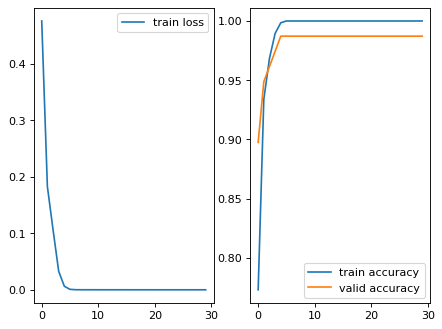

In [24]:
plt.figure(2,dpi=80)
plt.subplot(121)
plt.plot(loss_train,label='train loss')
plt.legend(loc='upper right')
plt.subplot(122)
plt.plot(accs_train,label='train accuracy')
plt.plot(accs_valid,label='valid accuracy')
# plt.plot(accs_test, label='test accuracy')
plt.legend(loc='lower right')
plt.show()

## 훈련된 모델을 pickle 파일로 저장

In [36]:
import pickle
with open("viT_biclassifi.pkl", "wb") as f:
    pickle.dump(model, f)

## Validation set에 대한 개별결과 확인 (Inference)

In [25]:
from PIL import Image

In [26]:
N = 51
#validset.imgs[N][0]

normal


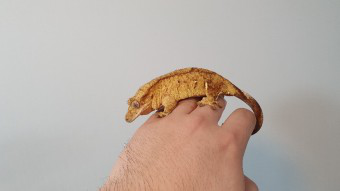

In [27]:
I = Image.open(validset.imgs[N][0])
X = train_transforms(I)
y = validset.targets[N]

print(tgtnames[y])
I


## Validation set에 대한 결과 요약하기

In [28]:
y_list = np.array([])
y_hat_list = np.array([])
for X,y in validloader:
  y_hat = model(X.to(device))    
  y_hat = y_hat.argmax(dim=1)
  y_list = np.append(y_list,y)
  y_hat_list = np.append(y_hat_list,y_hat.cpu().numpy())

In [29]:
from sklearn.metrics import (
    classification_report, confusion_matrix,
    ConfusionMatrixDisplay
)

In [30]:
print(classification_report(
    y_list,
    y_hat_list,
    target_names=tgtnames))

              precision    recall  f1-score   support

         MBD       0.98      1.00      0.99        40
      normal       1.00      0.97      0.99        38

    accuracy                           0.99        78
   macro avg       0.99      0.99      0.99        78
weighted avg       0.99      0.99      0.99        78



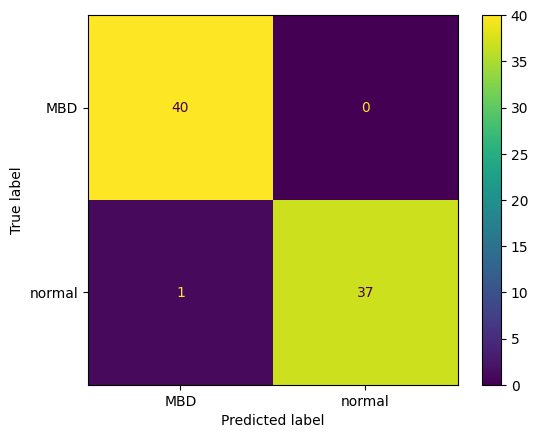

In [31]:
cm = confusion_matrix(
    y_list,
    y_hat_list,
#    normalize='true',
)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=tgtnames,
)
disp.plot(ax=plt.subplots(1, 1, facecolor='white')[1])

## Test set에 대한 결과 요약하기

In [32]:
y_list = np.array([])
y_hat_list = np.array([])
for X,y in testloader:
  y_hat = model(X.to(device))    
  y_hat = y_hat.argmax(dim=1)
  y_list = np.append(y_list,y)
  y_hat_list = np.append(y_hat_list,y_hat.cpu().numpy())

In [33]:
from sklearn.metrics import (
    classification_report, confusion_matrix,
    ConfusionMatrixDisplay
)

In [34]:
print(classification_report(
    y_list,
    y_hat_list,
    target_names=tgtnames))

              precision    recall  f1-score   support

         MBD       0.98      1.00      0.99        53
      normal       1.00      0.96      0.98        25

    accuracy                           0.99        78
   macro avg       0.99      0.98      0.99        78
weighted avg       0.99      0.99      0.99        78



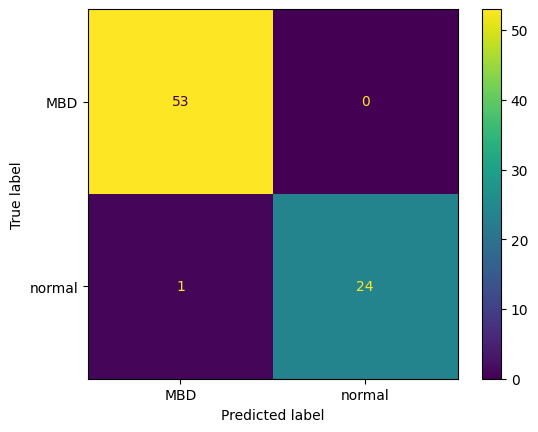

In [35]:
cm = confusion_matrix(
    y_list,
    y_hat_list,
#    normalize='true',
)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=tgtnames,
)
disp.plot(ax=plt.subplots(1, 1, facecolor='white')[1])